The holoviews.ipython extension is already loaded. To reload it, use:
  %reload_ext holoviews.ipython


:Overlay
   .Points.Positive_Average_Tone :Points   [x,y]
   .Points.Negative_Average_Tone :Points   [x,y]
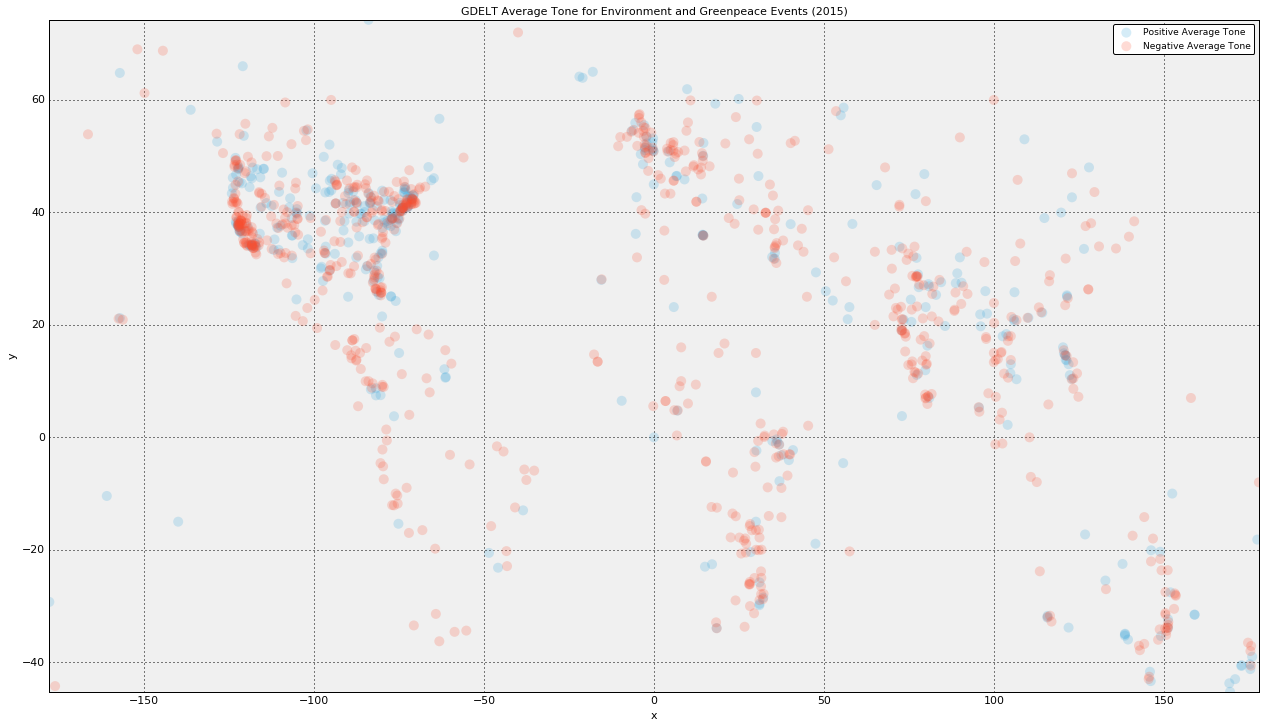

In [36]:
import blaze as bz
import pandas as pd
import holoviews as hv

# Load external holoviews module in iPython
# Using Jupyter Virtual Python Environment with in-line graphics
# visualisation
%load_ext holoviews.ipython
%output size=600

# Load MapReduce information into blaze data structure
# Using custom header based on MapReduce implementation results
data_split = bz.Data('data_files/Environmental & Greenpeace/Average Tone/data.csv')

# Set alpha and overlay aspect ratios
%opts Points (alpha=0.2 s=100) Overlay [aspect=1.8]

# Define negative Goldstein events from sub-negative to very negative
# Generally, Goldstein levels are negative, so positivity is hard to
# come by. Average tone may be a better metric
negative = data_split[(data_split.Average_Tone < 0)]
positive = data_split[(data_split.Average_Tone > 0)]

# Read negative and positive data into a Pandas DataFrame
negative = bz.into(pd.DataFrame, negative[['Longitude','Latitude']]).values
positive = bz.into(pd.DataFrame, positive[['Longitude','Latitude']]).values

# Display Holoviews labels overlay on Pandas model map
(hv.Points(positive, label="Positive Average Tone") * \
 hv.Points(negative,   label="Negative Average Tone")).relabel(
 "GDELT Average Tone for Environment and Greenpeace Events (2015)")